# Comparison at waist, 1st and 2nd-order shift and tilt



In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

### input

In [11]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 200e-6  #100 micron shift
k = 2*pi/lam

#alpha(10nrad)
alpha_min=-500e-6
alpha_max=500e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

### 1st-order

In [12]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                )
        )
    )

first_order_dws = phase_diff(alpha)
first_order_lps = gws(alpha)



### 2nd-order shift

In [13]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def second_order_shift(alpha):
    result= (
                a**2/(4*w**2)
            )
    return(result)


def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        +
                        second_order_shift(alpha)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    +
                    second_order_shift(alpha)
                )
        )
    )

second_order_shift_dws = phase_diff(alpha)
second_order_shift_lps = gws(alpha)

### 2nd-order tilt

In [14]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def second_order_tilt_r(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 + a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def second_order_tilt_l(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 - a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
            )
        )
    )

second_order_tilt_dws = phase_diff(alpha)
second_order_tilt_lps = gws(alpha)

# Combined 2nd-order

\begin{align*}
	\Delta \phi = &
		 \frac{1}{2} 
		 \left[
		 	\phi_R - \phi_L
		 \right]
		 \\ = &
		 \frac{1}{2}
		 \left[
							\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						+
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				+
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
				 -\frac{1}{16}\alpha^2 k^2 
	[
	 w_0^2
	+ 
	a w_0(
	\frac{3 \sqrt{2}-4}{\sqrt{\pi}}
	)
	]
				 		+
				 		\frac{a^2}{4 w_0^2} 
				 }
				\right]
		-
			\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						-
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				-
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
				-
				 \frac{1}{16}
				\alpha^2 k^2 
				[
	  			w_0^2
				- 
				a w_0(
			\frac{3 \sqrt{2}-4}{\sqrt{\pi}}
				)
				]
	+ 
		\frac{a^2}{4 w_0^2}}
				\right]
			\right]							 	
\end{align*}

In [15]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def second_order_shift(alpha):
    result= (
                a**2/(4*w**2)
            )
    return(result)

def second_order_tilt_r(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 + a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def second_order_tilt_l(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 - a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                        +
                        second_order_shift(alpha)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
                    +
                    second_order_shift(alpha)
            )
        )
    )

second_order_combined_dws = phase_diff(alpha)
second_order_combined_lps = gws(alpha)   




# Plots

### DWS

Combined and 2nd-order tilt overlap closely. 1st order and 2nd-order shift overlap.


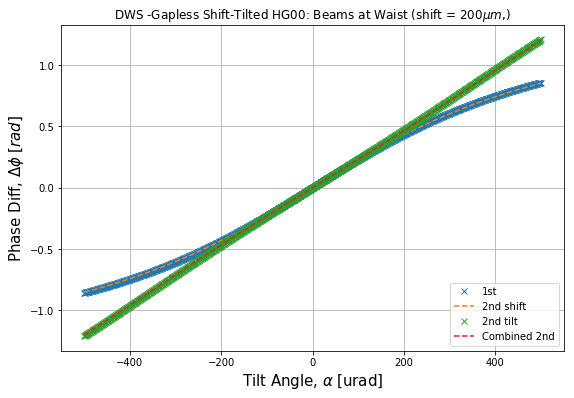

In [20]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

#1st-order
plt.plot(alpha*alpha_scale, first_order_dws, 'x', label='1st') 
#2nd-order shift
plt.plot(alpha*alpha_scale, second_order_shift_dws, '--', label='2nd shift') 
#2nd-order tilt
plt.plot(alpha*alpha_scale, second_order_tilt_dws, 'x', label='2nd tilt') 
#2nd-order combined
plt.plot(alpha*alpha_scale, second_order_combined_dws, '--', label='Combined 2nd') 


plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'DWS -Gapless Shift-Tilted HG00: Beams at Waist (shift = 200$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-total-DWS.pdf")

print("Combined and 2nd-order tilt overlap closely. 1st order and 2nd-order shift overlap.")

### LPS

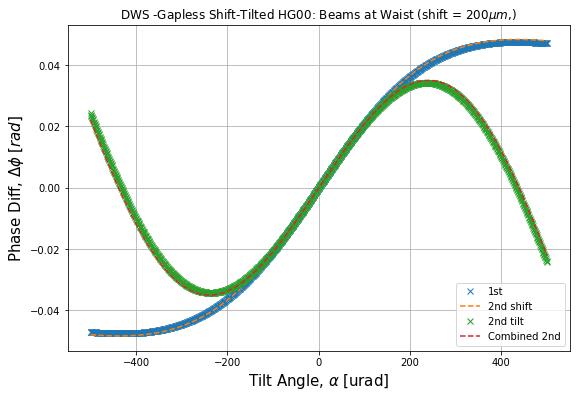

In [21]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

#1st-order
plt.plot(alpha*alpha_scale, first_order_lps, 'x', label='1st') 
#2nd-order shift
plt.plot(alpha*alpha_scale, second_order_shift_lps, '--', label='2nd shift') 
#2nd-order tilt
plt.plot(alpha*alpha_scale, second_order_tilt_lps, 'x', label='2nd tilt') 
#2nd-order combined
plt.plot(alpha*alpha_scale, second_order_combined_lps, '--', label='Combined 2nd') 


plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'DWS -Gapless Shift-Tilted HG00: Beams at Waist (shift = 200$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-total-LPS.pdf")

# Computed Deriv. 

$\frac{d \Delta \phi}{d \alpha}$

### Deriv. DWS

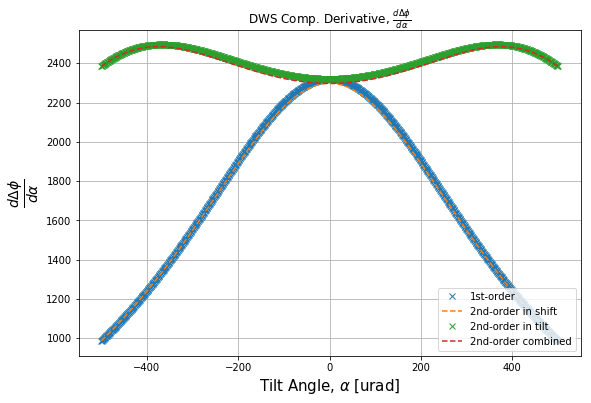

In [18]:
#function
def deriv(signal):
    result_der= (np.diff(signal) / np.diff(alpha) )
    return(result_der)
                 
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, deriv(first_order_dws)*phase_scale,'x', label='1st-order')
plt.plot(alpha2*alpha_scale, deriv(second_order_shift_dws)*phase_scale, '--', label='2nd-order in shift')
plt.plot(alpha2*alpha_scale, deriv(second_order_tilt_dws)*phase_scale,'x', label='2nd-order in tilt')
plt.plot(alpha2*alpha_scale, deriv(second_order_combined_dws)*phase_scale,'--', label='2nd-order combined')

plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'DWS Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-total-DWS-DER.pdf")


### Deriv. LPS

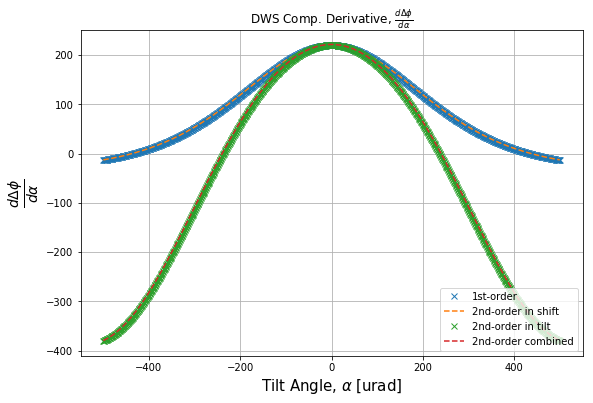

In [19]:
#function
def deriv(signal):
    result_der= (np.diff(signal) / np.diff(alpha) )
    return(result_der)
                 
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, deriv(first_order_lps)*phase_scale,'x', label='1st-order')
plt.plot(alpha2*alpha_scale, deriv(second_order_shift_lps)*phase_scale, '--', label='2nd-order in shift')
plt.plot(alpha2*alpha_scale, deriv(second_order_tilt_lps)*phase_scale,'x', label='2nd-order in tilt')
plt.plot(alpha2*alpha_scale, deriv(second_order_combined_lps)*phase_scale,'--', label='2nd-order combined')

plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'DWS Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-total-LPS-DER.pdf")
